<center><h2>Mahalanobis distance D²</h2></center>


Mahalanobis distance (**D²**) is used to measure the distance between a point and a distribution, considering the correlations between variables. It’s particularly useful when the variables are not independent and have different scales or units. Here’s why you might need to perform Mahalanobis distance:

### 1. **Accounts for Correlation Between Variables**:
   - In multivariate data, the variables often exhibit correlations. **Mahalanobis distance** accounts for these correlations by using the covariance matrix to adjust the distance.
   - For example, in a dataset with height and weight, these two variables are correlated. Euclidean distance would treat them as independent, but Mahalanobis distance adjusts for this relationship, providing a more accurate measure of "distance" between points.

### 2. **Normalization for Different Scales**:
   - Variables can have different units or ranges (e.g., height in meters and weight in kilograms). **Mahalanobis distance** normalizes the variables by incorporating the covariance matrix, ensuring that differences in scales don’t distort the distance measure.
   - In contrast, Euclidean distance is sensitive to the scale of the data and might be dominated by variables with larger units or ranges.

### 3. **Detection of Multivariate Outliers**:
   - Mahalanobis distance is commonly used to **detect outliers** in multivariate data. 
   - Points with large Mahalanobis distances from the mean of the data are considered outliers, as they are far from the center of the distribution, even if their individual variable values don't appear extreme.

### 4. **Multivariate Analysis**:
   - When working with **multivariate distributions**, Mahalanobis distance is often used to quantify the distance between an observation and the mean of a distribution or to compare the similarity between two distributions.
   - For instance, it can be used to measure how close a new observation is to the centroid of a cluster in **clustering algorithms**.

### 5. **Better Performance in Classification**:
   - In **classification problems**, Mahalanobis distance can be used to measure how similar a point is to different classes. 
   - For example, in discriminant analysis, Mahalanobis distance helps determine whether a point belongs to one class or another by measuring how far it is from each class mean, considering the variance-covariance structure within each class.

### 6. **Applications**:
   - **Face recognition**: Mahalanobis distance is used in facial recognition algorithms to determine how close a face is to a reference face, accounting for the relationships between different facial features.
   - **Anomaly detection**: In finance, Mahalanobis distance is used to detect fraudulent transactions by measuring how far a new transaction is from the expected pattern of transactions.
   - **Quality control**: Mahalanobis distance can be used to determine whether a new batch of products deviates significantly from previous batches by considering the relationships between multiple product characteristics.

### Formula for Mahalanobis Distance:
$$
D^2 = (x - \mu)^T \Sigma^{-1} (x - \mu)
$$

- **\( x \)**: The vector of data points (an observation).
- **\( \mu \)**: The mean vector of the distribution.
- **\( \Sigma \)**: The covariance matrix of the distribution, which accounts for the relationships between the variables.
- **\( \Sigma^{-1} \)**: The inverse of the covariance matrix, which adjusts for correlations between the variables.

### Conclusion:
Mahalanobis distance is essential in multivariate data analysis because it accounts for the correlations between variables and differences in scales, making it more robust than Euclidean distance for detecting outliers, comparing distributions, or performing classification tasks.


<center><h2>CODE</h2></center>

In [4]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import mahalanobis
from numpy.linalg import inv
from scipy.stats import chi2

### Generating Data

In [5]:

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for 40 cars
data = {
    'Price': np.random.uniform(15000, 50000, 40),         # Prices between $15,000 and $50,000
    'Distance': np.random.uniform(0, 300000, 40),         # Distance between 0 and 300,000 km
    'Emission': np.random.uniform(50, 400, 40),           # Emissions between 50g/km and 400g/km
    'Performance': np.random.uniform(100, 500, 40),       # Performance score between 100 and 500
    'Mileage': np.random.uniform(10, 40, 40)              # Mileage between 10 and 40 miles per gallon
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Print the first few rows of the data
print(df.head())


          Price       Distance    Emission  Performance    Mileage
0  28108.904160   36611.470453  352.086199   422.976062  21.033494
1  48275.000724  148553.073033  268.154344   458.436520  28.969175
2  40619.787963   10316.556335  165.814309   227.201390  29.005891
3  35953.046947  272796.120624   72.245423   144.020770  26.073241
4  20460.652415   77633.994480  158.843813   191.174065  12.708693


In [6]:
# Calculate mean vector and covariance matrix for the 5 columns
mean_vector = df.mean().values
cov_matrix = df.cov().values
inv_cov_matrix = inv(cov_matrix)

# Function to calculate Mahalanobis distance for each observation
def mahalanobis_distance(row, mean_vector, inv_cov_matrix):
    diff = row - mean_vector
    md = np.sqrt(np.dot(np.dot(diff, inv_cov_matrix), diff.T))
    return md

# Apply the function to each row in the DataFrame (using only the relevant columns)
df['Mahalanobis_D2'] = df.apply(lambda row: mahalanobis_distance(row.values, mean_vector, inv_cov_matrix), axis=1)

# Print the results with Mahalanobis distances
df.head(10)


,Price,Distance,Emission,Performance,Mileage,Mahalanobis_D2
0,28108.904160,36611.470453,352.086199,422.976062,21.033494,2.189294
1,48275.000724,148553.073033,268.154344,458.436520,28.969175,2.323676
2,40619.787963,10316.556335,165.814309,227.201390,29.005891,2.113913
3,35953.046947,272796.120624,72.245423,144.020770,26.073241,2.528953
4,20460.652415,77633.994480,158.843813,191.174065,12.708693,2.502139
5,20459.808212,198756.685306,163.814163,270.843115,35.059075,1.765385
6,17032.926426,93513.322827,305.362162,427.205906,19.623402,2.318112
7,45316.165102,156020.406353,273.145115,444.292233,15.595555,2.071525
8,36039.025411,164013.083803,360.524460,102.780852,11.223254,2.612013
9,39782.540223,55456.336658,215.275224,304.298921,27.726788,1.395439


In [7]:
df['p-value'] = 1 - chi2.cdf(df['Mahalanobis_D2'], df=5)
df

,Price,Distance,Emission,Performance,Mileage,Mahalanobis_D2,p-value
0,28108.904160,36611.470453,352.086199,422.976062,21.033494,2.189294,0.822381
1,48275.000724,148553.073033,268.154344,458.436520,28.969175,2.323676,0.802783
2,40619.787963,10316.556335,165.814309,227.201390,29.005891,2.113913,0.833169
3,35953.046947,272796.120624,72.245423,144.020770,26.073241,2.528953,0.772129
4,20460.652415,77633.994480,158.843813,191.174065,12.708693,2.502139,0.776173
5,20459.808212,198756.685306,163.814163,270.843115,35.059075,1.765385,0.880562
6,17032.926426,93513.322827,305.362162,427.205906,19.623402,2.318112,0.803603
7,45316.165102,156020.406353,273.145115,444.292233,15.595555,2.071525,0.839162
8,36039.025411,164013.083803,360.524460,102.780852,11.223254,2.612013,0.759539
9,39782.540223,55456.336658,215.275224,304.298921,27.726788,1.395439,0.924812


In [8]:
outliers = df[df['p-value']<0.01]
print("Outliers, alpha=1%")
outliers

Outliers, alpha=1%


,Price,Distance,Emission,Performance,Mileage,Mahalanobis_D2,p-value


## Visualization

This code visualizes the **Mahalanobis distance** between two points in a 3D space projected onto a 2D plane, and calculates the distance. Here’s a breakdown:

---

### 1. **Imports**
- **`numpy`**: For numerical operations (arrays and matrix computations).
- **`matplotlib.pyplot`**: For visualization (scatter plot, arrows, annotations).
- **`scipy.spatial.distance`**: To compute the Mahalanobis distance.

---

### 2. **Key Concepts**
- **Mahalanobis Distance**: Measures the distance between two points in a multivariate space, considering the covariance structure of the data. It accounts for correlations and the spread of data.
  
  **Formula**:
  \[
  D_M = \sqrt{(x - \mu)^T \Sigma^{-1} (x - \mu)}
  \]
  - \( x, \mu \): Vectors of data points.
  - \( \Sigma^{-1} \): Inverse of the covariance matrix.

---

### 3. **Steps in the Code**

#### a. Define Points
```python
point1 = np.array([1, 2, 3])
point2 = np.array([4, 5, 6])
```
Two points in a 3D space are defined.

---

#### b. Define Covariance Matrix
```python
covariance = np.array([[1, 0, 0],
                       [0, 1, 0],
                       [0, 0, 1]])
```
The covariance matrix is set as the identity matrix, implying no correlation between dimensions and equal variance.

---

#### c. Compute Mahalanobis Distance
```python
mahalanobis_distance = distance.mahalanobis(point1, point2, np.linalg.inv(covariance))
```
- `np.linalg.inv(covariance)`: Computes the inverse of the covariance matrix.
- `distance.mahalanobis`: Calculates the Mahalanobis distance between `point1` and `point2`.

For an identity covariance matrix, the Mahalanobis distance simplifies to the Euclidean distance.

---

#### d. Visualization
##### Scatter Plot
```python
plt.scatter([point1[0], point2[0]], [point1[1], point2[1]], color='blue', label='Points')
```
Plots `point1` and `point2` on the X-Y plane with blue markers.

##### Annotations
```python
plt.annotate('Point 1', (point1[0], point1[1]), textcoords="offset points", xytext=(-10,10), ha='center')
plt.annotate('Point 2', (point2[0], point2[1]), textcoords="offset points", xytext=(-10,10), ha='center')
```
Labels `point1` and `point2` on the plot.

##### Arrow Representation
```python
plt.arrow(point1[0], point1[1], point2[0] - point1[0], point2[1] - point1[1], color='red', width=0.05, length_includes_head=True, label='Mahalanobis Distance')
```
Adds a red arrow between the two points representing the Mahalanobis distance (on the X-Y projection).

##### Other Plot Elements
```python
plt.title('Mahalanobis Distance')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.xlim(0, 7)
plt.ylim(0, 8)
plt.show()
```
- Titles the plot and labels axes.
- Adds a legend for clarity.
- Sets limits for better visibility of the points.

---

#### e. Print Distance
```python
print("Mahalanobis distance:", mahalanobis_distance)
```
Displays the computed Mahalanobis distance in the console.

---

### **Outcome**
- A plot with:
  - Two points (`point1` and `point2`).
  - A red arrow showing their relationship.
- Mahalanobis distance printed in the console.

---

### **Notes**
- The visualization is in 2D (using only the first two coordinates of the points), while the Mahalanobis distance is calculated in 3D.
- For more realistic covariance structures, use sample data covariance rather than an identity matrix.

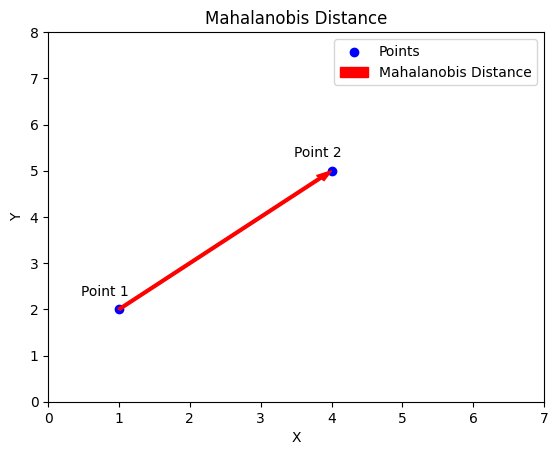

Mahalanobis distance: 5.196152422706632


In [1]:
#Visualizing mahalonobis distance
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

# Define the two points as arrays
point1 = np.array([1, 2, 3])
point2 = np.array([4, 5, 6])
# Define the covariance matrix
covariance = np.array([[1, 0, 0],
                       [0, 1, 0],
                       [0, 0, 1]])
# Compute the Mahalanobis distance
mahalanobis_distance = distance.mahalanobis(point1, point2, np.linalg.inv(covariance))
# Create a scatter plot of the points
plt.scatter([point1[0], point2[0]], [point1[1], point2[1]], color='blue', label='Points')
plt.annotate('Point 1', (point1[0], point1[1]), textcoords="offset points", xytext=(-10,10), ha='center')
plt.annotate('Point 2', (point2[0], point2[1]), textcoords="offset points", xytext=(-10,10), ha='center')
# Create an arrow to represent the Mahalanobis distance
plt.arrow(point1[0], point1[1], point2[0] - point1[0], point2[1] - point1[1], color='red', width=0.05, length_includes_head=True, label='Mahalanobis Distance')
# Set plot title and labels
plt.title('Mahalanobis Distance')
plt.xlabel('X')
plt.ylabel('Y')
# Add a legend
plt.legend()
# Set axis limits
plt.xlim(0, 7)
plt.ylim(0, 8)
# Show the plot
plt.show()
# Print the Mahalanobis distance
print("Mahalanobis distance:", mahalanobis_distance)